In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## fixes 
1. Electrical -> i will see the price range of this house then i will calculate the mode of the electrical column for the entries in the nearby range 
2. Catogorical Columns where NAN Stands For No(NA) -> I think while encoding the features where columns have contextual ranking the No will stand for 0 . i.e very less weight or value (while performing label encoding).
colums -> ['BsmtFinType1','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType2','GarageCond'...]
3. Numerical Columns where NAN is present , that is because they are also dependent on some other feature , for ex. like garage yearbuilt , if there is no garage the year built is the NaN , similary with MasVnrArea and MasVnrType , i think the lotFrontage is different which do not depend on any attribute . So Filling them is kinda hassle, for Vnr area we have 0 , when the vnr type is 0 . but doing the same for Year is kinda weird as the year is big Values and replacing it with 0 or -1  where is no garage .

In [6]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [7]:
missing_cols = (
    df.select_dtypes(include='object')
      .isnull()
      .sum()
      .sort_values(ascending=False)
      .loc[lambda x: x > 0]
)

missing_cols


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
GarageFinish      81
GarageQual        81
GarageType        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
Electrical         1
dtype: int64

In [8]:
missing_cols = df.isnull().sum().sort_values(ascending=False).loc[lambda x: x > 0]
missing_cols

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

In [9]:
df[['MasVnrType','SalePrice']][df['MasVnrArea'].isnull()]

,MasVnrType,SalePrice
234,NaN,216500
529,NaN,200624
650,NaN,205950
936,NaN,184900
973,NaN,182000
977,NaN,199900
1243,NaN,465000
1278,NaN,237000


In [10]:
df[['MasVnrArea','SalePrice']][df['MasVnrArea'].isnull()].shape

(8, 2)

In [11]:
# Continous Numerical Variable
df['MasVnrArea'][(df['MasVnrArea'].isnull())]

234    NaN
529    NaN
650    NaN
936    NaN
973    NaN
977    NaN
1243   NaN
1278   NaN
Name: MasVnrArea, dtype: float64

In [12]:
df['Electrical'][(df['Electrical'].isnull())]

1379    NaN
Name: Electrical, dtype: object

--- 
## Preprocessing Starts Here

In [13]:
missing_cols

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

In [14]:
# The Professional Way: Vectorized Fill
cols_fill_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
                  'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
                  'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

df[cols_fill_none] = df[cols_fill_none].fillna("None")

In [15]:
missing_cols = df.isnull().sum().sort_values(ascending=False).loc[lambda x: x > 0]
missing_cols

MasVnrType     872
LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
Electrical       1
dtype: int64

In [16]:
# 1. MasVnrType (Masonry Veneer Type)
# 872 missing means the house has NO veneer.
# We fill with "None" so it becomes a valid category for One-Hot Encoding later.
df['MasVnrType'] = df['MasVnrType'].fillna("None")

# 2. MasVnrArea (Masonry Veneer Area)
# If Type is "None", Area must be 0.
# The 8 missing values are likely just gaps. We fill with 0.
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

# 3. LotFrontage
# Houses in the same neighborhood usually have similar street frontage.
# We fill missing values with the median frontage of *that specific neighborhood*.
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage']\
    .transform(lambda x: x.fillna(x.median()))

# 4. GarageYrBlt
# 81 missing means "No Garage".
# WARNING for Linear Regression: Filling with 0 creates a massive outlier (Year 0 vs Year 2000).
# Better approach: Fill with 0, but create a "HasGarage" feature later to help the model.
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

# 5. Electrical
# Only 1 missing. Just use the most common value (Mode).
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

# Verify everything is clean
print(df[['MasVnrType', 'MasVnrArea', 'LotFrontage', 'GarageYrBlt', 'Electrical']].isnull().sum())

MasVnrType     0
MasVnrArea     0
LotFrontage    0
GarageYrBlt    0
Electrical     0
dtype: int64


Garage Year Built : Handle 0 Year Vs 2000 year Gap 

In [17]:
# 1. Create a "GarageAge" Feature
# We replace the '0's with the YearBuilt (assuming if it had a garage, it would be as old as the house)
# This removes the massive 2000-year gap.
df.loc[df['GarageYrBlt'] == 0, 'GarageYrBlt'] = df['YearBuilt']

# Now create the new feature: Age of Garage relative to Year Sold
df['GarageAge'] = df['YrSold'] - df['GarageYrBlt']

# 2. Drop the original 'GarageYrBlt' column
# It is now redundant and dangerous.
df.drop(columns=['GarageYrBlt'], inplace=True)

# 3. Verify
print(df[['GarageAge', 'YearBuilt']].head())

   GarageAge  YearBuilt
0        5.0       2003
1       31.0       1976
2        7.0       2001
3        8.0       1915
4        8.0       2000


# Visual Hunt

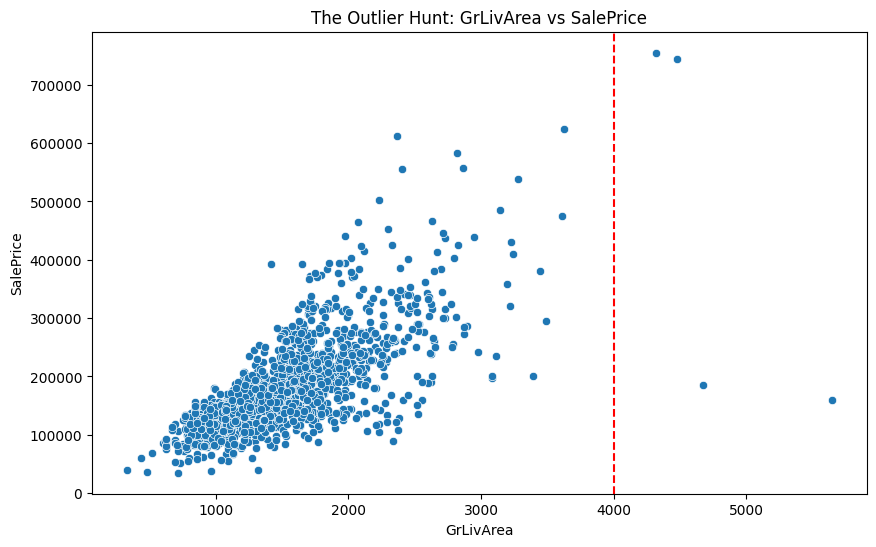

In [18]:
# 1. Check if very big houses sold for lower prices (Outlier)
# Visualize the Outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'])
plt.title("The Outlier Hunt: GrLivArea vs SalePrice")
plt.axvline(x=4000, color='r', linestyle='--')
plt.show()

In [19]:
# 2. Drop the outliers
# We remove houses > 4000 sq ft that sold for < $300,000
# This cleans up the linear relationship significantly.
df = df.drop(df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000)].index)

# Reset index just to be safe
df = df.reset_index(drop=True)
print(f"Rows remaining: {df.shape[0]}")

Rows remaining: 1458


<Axes: xlabel='SalePrice', ylabel='Count'>

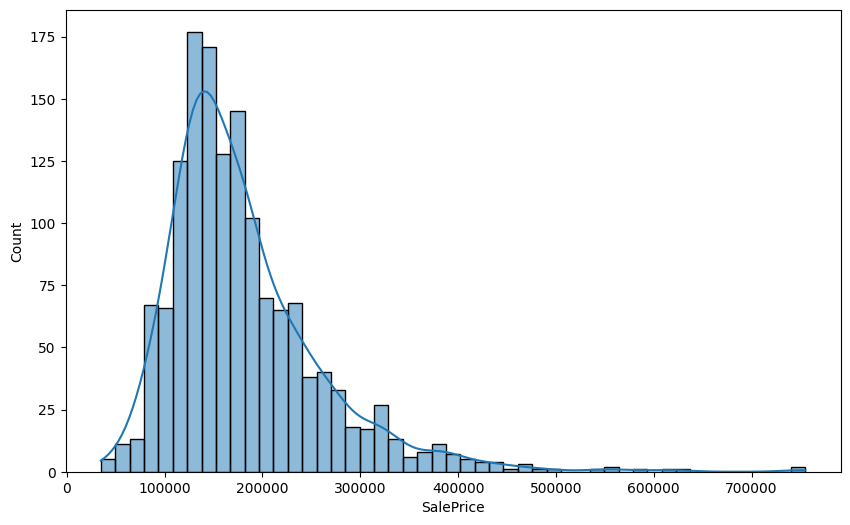

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(x=df['SalePrice'],kde=True) ## Right Skewed ! But LR Loves Normal Distribution

In [21]:
df.duplicated().sum()

np.int64(0)

In [22]:
# 1. Total Square Footage (Strongest Predictor)
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

# 2. Total Bathrooms (Luxury Metric)
# We weight full baths as 1 and half baths as 0.5
df['TotalBath'] = (df['FullBath'] + (0.5 * df['HalfBath']) + 
                   df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))

# 3. House Age & Remodel Age
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df['RemodelAge'] = df['YrSold'] - df['YearRemodAdd']

# 4. Drop the original columns to avoid "Multicollinearity" (confusion)
# (Optional: You can keep them, but for a simple Linear Model, less is often more)
df = df.drop(columns=['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'YearBuilt', 'YearRemodAdd'])

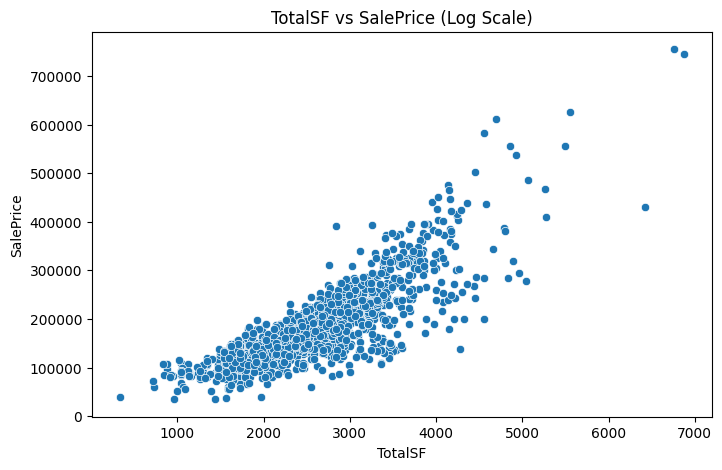

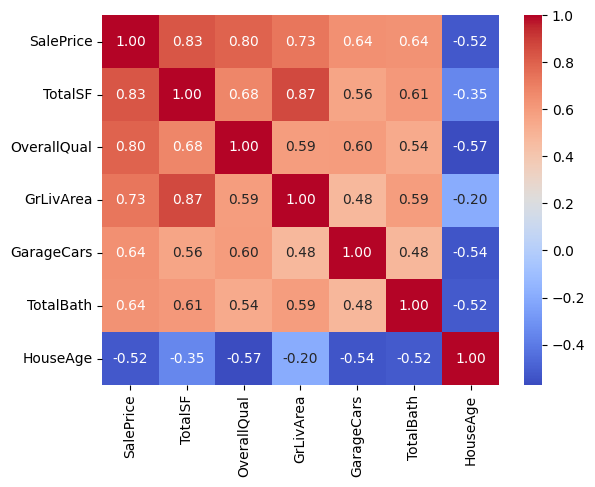

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check the correlation of your new Super Feature
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['TotalSF'], y=df['SalePrice'])
plt.title("TotalSF vs SalePrice (Log Scale)")
plt.show()

# Check the Correlation Matrix for your top features
corr_matrix = df[['SalePrice', 'TotalSF', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBath', 'HouseAge']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

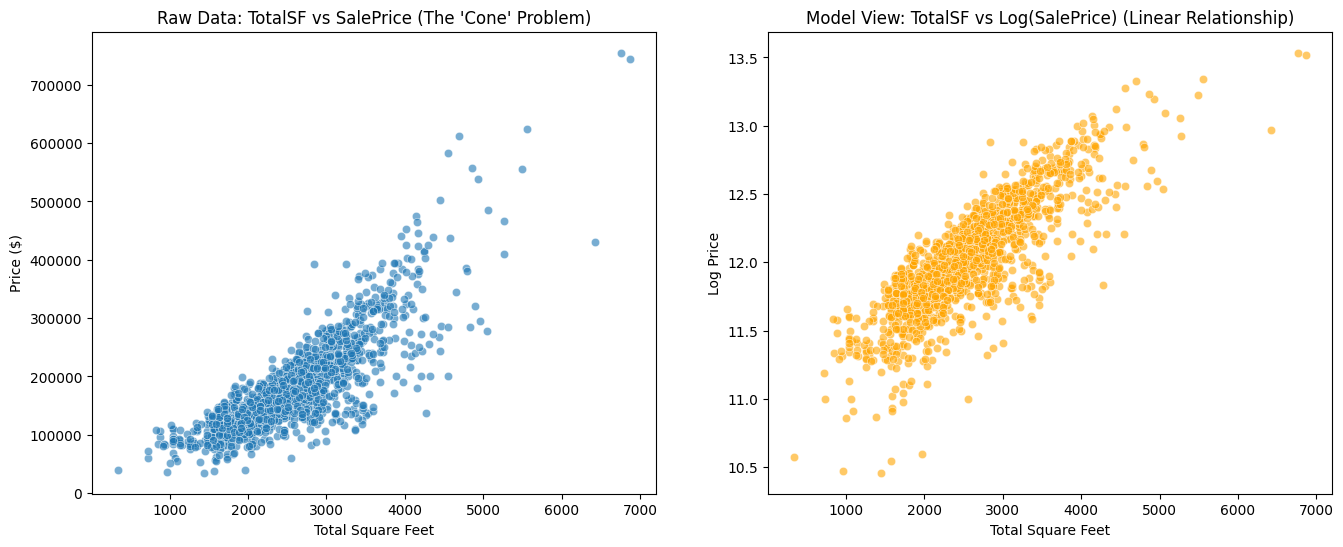

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Raw Data (What is in your DF right now)
# Expect to see a "cone" shape (variance increases as price increases)
sns.scatterplot(x=df['TotalSF'], y=df['SalePrice'], ax=ax[0], alpha=0.6)
ax[0].set_title("Raw Data: TotalSF vs SalePrice (The 'Cone' Problem)")
ax[0].set_xlabel("Total Square Feet")
ax[0].set_ylabel("Price ($)")

# Plot 2: Simulated Log Data (What the model will see)
# We apply log1p ONLY for this plot. The DF remains unchanged.
sns.scatterplot(x=df['TotalSF'], y=np.log1p(df['SalePrice']), ax=ax[1], color='orange', alpha=0.6)
ax[1].set_title("Model View: TotalSF vs Log(SalePrice) (Linear Relationship)")
ax[1].set_xlabel("Total Square Feet")
ax[1].set_ylabel("Log Price")

plt.show()

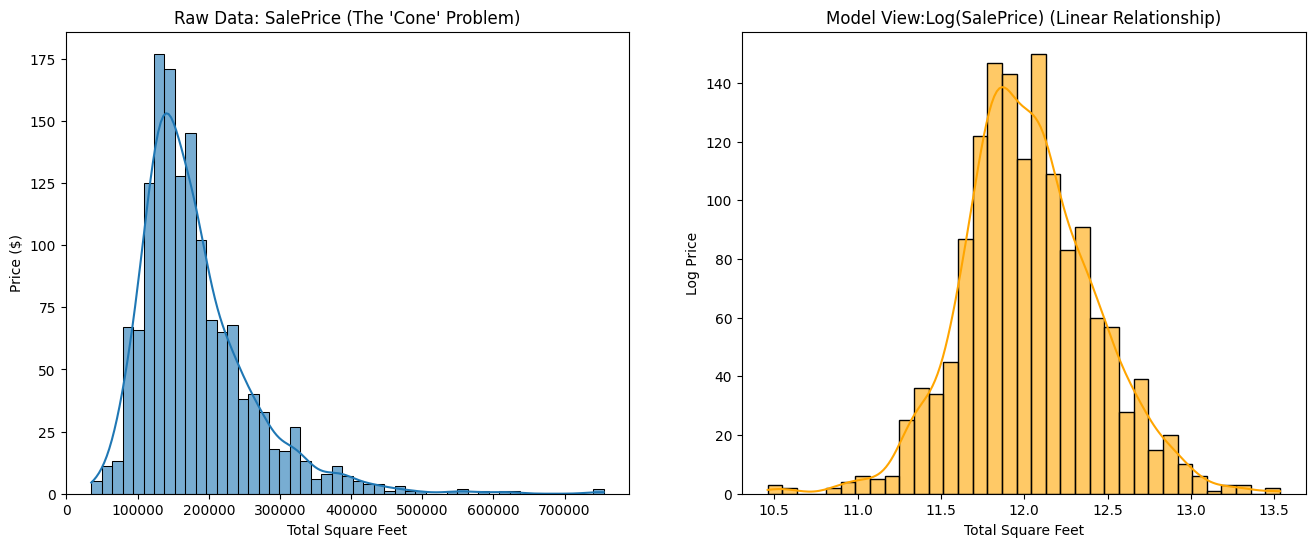

In [25]:

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Raw Data (What is in your DF right now)
# Expect to see a "cone" shape (variance increases as price increases)
sns.histplot(x=df['SalePrice'], ax=ax[0], alpha=0.6,kde=True)
ax[0].set_title("Raw Data: SalePrice (The 'Cone' Problem)")
ax[0].set_xlabel("Total Square Feet")
ax[0].set_ylabel("Price ($)")

# Plot 2: Simulated Log Data (What the model will see)
# We apply log1p ONLY for this plot. The DF remains unchanged.
sns.histplot(x=np.log1p(df['SalePrice']),kde=True, ax=ax[1], color='orange', alpha=0.6)
ax[1].set_title("Model View:Log(SalePrice) (Linear Relationship)")
ax[1].set_xlabel("Total Square Feet")
ax[1].set_ylabel("Log Price")

plt.show()

In [26]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolA

---
# Real Deal

---

1. The Ordinal Features (Order Matters)
- These need OrdinalEncoder. We must preserve the rank (Excellent > Good > Poor).
- Senior Note: Utilities is almost always "AllPub", so it has low variance, but if you keep it, it is ordinal. Functional is also ordinal (Typical > Minor > ...).

In [27]:
ord_cols = [
    "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC", 
    "KitchenQual", "FireplaceQu", "GarageQual", "GarageCond", "PoolQC", 
    "LotShape", "LandSlope", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", 
    "Functional", "GarageFinish", "PavedDrive", "Fence", "Utilities"
]

In [38]:
df[ord_cols].sample(10)

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC,LotShape,LandSlope,BsmtExposure,BsmtFinType1,BsmtFinType2,Functional,GarageFinish,PavedDrive,Fence,Utilities
309,Gd,TA,Ex,TA,Ex,Ex,Ex,TA,TA,None,IR1,Gtl,Gd,GLQ,Unf,Typ,Fin,Y,None,AllPub
1018,Gd,TA,Gd,TA,Ex,Gd,Gd,TA,TA,None,Reg,Gtl,Gd,GLQ,Unf,Typ,Fin,Y,None,AllPub
866,TA,TA,TA,TA,TA,Fa,None,TA,TA,None,Reg,Gtl,No,ALQ,Unf,Typ,RFn,Y,None,AllPub
1050,Gd,TA,Gd,TA,Ex,Gd,Gd,TA,TA,None,IR1,Gtl,Av,Unf,Unf,Typ,Fin,Y,None,AllPub
1437,TA,TA,TA,TA,TA,TA,TA,TA,TA,None,Reg,Gtl,No,GLQ,Rec,Typ,RFn,Y,None,AllPub
622,Gd,TA,Gd,TA,Ex,Gd,TA,TA,TA,None,Reg,Gtl,No,GLQ,Unf,Typ,Unf,Y,None,AllPub
1456,TA,TA,TA,TA,Gd,Gd,None,TA,TA,None,Reg,Gtl,Mn,GLQ,Rec,Typ,Unf,Y,None,AllPub
951,TA,Gd,Gd,TA,Gd,TA,None,TA,TA,None,Reg,Gtl,Av,GLQ,Unf,Typ,Fin,Y,MnPrv,AllPub
874,Gd,TA,Gd,TA,Ex,Ex,Gd,TA,TA,None,Reg,Gtl,Av,GLQ,Unf,Typ,Fin,Y,None,AllPub
461,Gd,Gd,Gd,Gd,Ex,Gd,None,TA,TA,None,Reg,Gtl,No,ALQ,BLQ,Typ,RFn,Y,MnPrv,AllPub


2. The Nominal Features (No Order)
- These need OneHotEncoder. There is no rank between "Corner" and "Inside".
- Senior Note: MSSubClass looks like a number (20, 60, etc.), but it is actually a code for the type of dwelling. Do not put this in numerical! It must be One-Hot Encoded.

In [29]:
nom_cols = [
    "MSSubClass", "MSZoning", "Street", "Alley", "LandContour", "LotConfig", 
    "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", 
    "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", 
    "Foundation", "Heating", "CentralAir", "Electrical", "GarageType", 
    "MiscFeature", "SaleType", "SaleCondition"
]

In [37]:
df[nom_cols].sample(10)

,MSSubClass,MSZoning,Street,Alley,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,...,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,GarageType,MiscFeature,SaleType,SaleCondition
584,20,RL,Pave,None,Lvl,Inside,Timber,Norm,Norm,1Fam,...,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,None,New,Partial
732,20,RL,Pave,None,Lvl,Corner,Sawyer,Feedr,Norm,1Fam,...,HdBoard,None,CBlock,GasA,Y,SBrkr,Attchd,Shed,WD,Normal
41,20,RL,Pave,None,Lvl,Inside,Timber,Norm,Norm,1Fam,...,VinylSd,None,CBlock,GasA,Y,SBrkr,Attchd,None,WD,Normal
645,20,RL,Pave,None,Lvl,Inside,NAmes,Norm,Norm,1Fam,...,MetalSd,None,CBlock,GasA,Y,SBrkr,Detchd,None,WD,Normal
919,60,RL,Pave,None,Lvl,Inside,SawyerW,Norm,Norm,1Fam,...,HdBoard,BrkFace,PConc,GasA,Y,SBrkr,Attchd,None,WD,Normal
419,20,RL,Pave,None,Lvl,Inside,NAmes,Norm,Norm,1Fam,...,VinylSd,None,CBlock,GasA,Y,SBrkr,Attchd,None,WD,Normal
1086,60,FV,Pave,None,Lvl,Inside,Somerst,Norm,Norm,1Fam,...,VinylSd,None,PConc,GasA,Y,SBrkr,Attchd,None,WD,Normal
793,60,RL,Pave,None,Lvl,Corner,Gilbert,Norm,Norm,1Fam,...,MetalSd,None,PConc,GasA,Y,SBrkr,Attchd,Shed,WD,Normal
1027,50,RL,Pave,None,Lvl,Inside,NAmes,Artery,Norm,1Fam,...,Wd Shng,None,CBlock,GasA,Y,SBrkr,Attchd,None,WD,Normal
1149,20,RL,Pave,None,Lvl,Inside,NAmes,Norm,Norm,1Fam,...,BrkFace,None,CBlock,GasA,Y,FuseA,Attchd,None,WD,Normal


3. The Numerical Features (The Math)
- These need StandardScaler. They are counts, areas, or ages.
- Senior Note: OverallQual (1-10) is technically Ordinal, but because it is 1-10 numeric, Linear Regression handles it very well as a Numerical feature. It is one of the few exceptions.

In [30]:
num_cols = [
    "LotFrontage", "LotArea", "OverallQual", "OverallCond", "MasVnrArea", 
    "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "LowQualFinSF", "GrLivArea", 
    "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", 
    "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "GarageArea", 
    "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", 
    "PoolArea", "MiscVal", "MoSold", 
    # Your New Super Features (Excellent additions!)
    "GarageAge", "TotalSF", "TotalBath", "HouseAge", "RemodelAge"
]

In [39]:
df[num_cols].sample(10)

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,GrLivArea,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,GarageAge,TotalSF,TotalBath,HouseAge,RemodelAge
886,59.0,16466,5,7,0.0,0,0,816,0,1393,...,0,265,0,0,4,53.0,2209,1.5,53,53
1119,59.0,8263,6,5,0.0,0,0,1012,0,1012,...,0,0,0,0,5,87.0,2024,1.0,87,57
281,60.0,7200,6,5,68.0,905,0,357,0,1262,...,0,0,0,0,5,0.0,2524,2.0,0,0
906,86.0,11500,7,7,0.0,223,0,794,0,2057,...,0,322,0,0,6,70.0,3074,1.5,70,19
892,71.0,13284,5,5,0.0,1064,0,319,0,1383,...,0,0,0,0,6,54.0,2766,2.0,54,54
416,74.0,7844,6,7,203.0,209,0,463,0,1400,...,0,0,0,0,3,28.0,2072,1.5,28,28
1270,80.0,9156,6,7,0.0,0,0,1489,0,1489,...,0,0,0,0,8,41.0,2978,2.0,41,41
556,60.0,11040,4,6,0.0,637,0,0,0,1336,...,0,0,0,0,9,12.0,1973,1.5,86,56
1418,90.0,11700,6,6,420.0,404,0,304,0,1416,...,0,119,0,0,5,38.0,2124,2.5,38,38
349,56.0,20431,9,5,870.0,1410,0,438,0,2728,...,0,0,0,0,4,0.0,4576,3.5,1,0


4. The "Drop" List (Redundant)
- Since you created "Super Features", you should drop the original ingredients to avoid "Multicollinearity" (confusion).

In [31]:
drop_cols = [
    "Id",             # Useless ID
    "YrSold",         # Captured in HouseAge
    "YearBuilt",      # Captured in HouseAge
    "YearRemodAdd",   # Captured in RemodelAge
    "TotalBsmtSF",    # Captured in TotalSF (if you summed it)
    "1stFlrSF",       # Captured in TotalSF
    "2ndFlrSF"        # Captured in TotalSF
]

In [43]:
len(df.columns) == (len(drop_cols) + len(num_cols) + len(nom_cols) + len(ord_cols))
print(len(df.columns))
print((len(drop_cols) + len(num_cols) + len(nom_cols) + len(ord_cols)))

80
84


In [32]:
from sklearn.preprocessing import 
preprocessor = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('ord', ord_pipe, ord_cols),
    ('nom', nom_pipe, nom_cols)
], remainder='drop') # This automatically drops the columns in the 'drop_cols' list!

SyntaxError: Expected one or more names after 'import' (1989458017.py, line 1)

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import joblib  # This is how we save the model!

# ==============================================================================
# 1. SETUP & FEATURE ENGINEERING (The "Manual" Part)
# ==============================================================================
# Load Data
train_df = pd.read_csv("./train.csv")
test_df = pd.read_csv("./test.csv")  # Make sure this file exists!

# Define a function to do the manual engineering so we can apply it to BOTH Train and Test
def engineer_features(df):
    # 1. Fix the Garage Year (The 0 vs 2000 problem)
    # Note: We can't use 'YearBuilt' directly if it's missing, but assuming train logic holds
    if 'GarageYrBlt' in df.columns:
        df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['YearBuilt'])
        df['GarageAge'] = df['YrSold'] - df['GarageYrBlt']
    
    # 2. Super Features
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    df['TotalBath'] = (df['FullBath'] + (0.5 * df['HalfBath']) + 
                       df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))
    df['HouseAge'] = df['YrSold'] - df['YearBuilt']
    df['RemodelAge'] = df['YrSold'] - df['YearRemodAdd']
    
    return df

# Apply engineering to BOTH datasets immediately
train_df = engineer_features(train_df)
test_df = engineer_features(test_df)

# Drop Outliers (TRAIN ONLY - Never drop rows from Test!)
train_df = train_df.drop(train_df[(train_df['GrLivArea'] > 4000) & (train_df['SalePrice'] < 300000)].index)

# ==============================================================================
# 2. DEFINE LISTS (The "Mapping" Part)
# ==============================================================================
ord_cols = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC", 
            "KitchenQual", "FireplaceQu", "GarageQual", "GarageCond", "PoolQC"]

nom_cols = ["MSSubClass", "MSZoning", "Street", "Alley", "LandContour", "LotConfig", 
            "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", 
            "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", 
            "Foundation", "Heating", "CentralAir", "Electrical", "GarageType", 
            "MiscFeature", "SaleType", "SaleCondition", "LotShape", "LandSlope", 
            "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Functional", 
            "GarageFinish", "PavedDrive", "Fence", "Utilities"]

num_cols = ["LotFrontage", "LotArea", "OverallQual", "OverallCond", "MasVnrArea", 
            "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "LowQualFinSF", "GrLivArea", 
            "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", 
            "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "GarageArea", 
            "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", 
            "PoolArea", "MiscVal", "MoSold", "GarageAge", "TotalSF", "TotalBath", 
            "HouseAge", "RemodelAge"]

quality_order = ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']

# ==============================================================================
# 3. BUILD PIPELINE (The "Factory")
# ==============================================================================
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

ord_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='None')),
    ('encoder', OrdinalEncoder(categories=[quality_order] * len(ord_cols), 
                               handle_unknown='use_encoded_value', unknown_value=-1))
])

nom_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='None')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('ord', ord_pipe, ord_cols),
    ('nom', nom_pipe, nom_cols)
], remainder='drop')

# The Model (Ridge + Log Transform)
model = TransformedTargetRegressor(
    regressor=Ridge(alpha=1.0),
    func=np.log1p,
    inverse_func=np.expm1
)

full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# ==============================================================================
# 4. TRAIN & VALIDATE (The "Exam")
# ==============================================================================
X = train_df  # Contains all columns
y = train_df['SalePrice']

# Split Data (80% Train, 20% Validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# FIT (This is where the magic happens)
print("Training model...")
full_pipeline.fit(X_train, y_train)

# VALIDATE
val_preds = full_pipeline.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, val_preds))
print(f"Validation RMSE: ${rmse:,.2f}")

# ==============================================================================
# 5. PREDICT ON NEW DATA (The "Test.csv")
# ==============================================================================
# The pipeline automatically handles missing values and encoding for test_df!
# We do NOT call fit() on test_df. Only predict().
print("Generating predictions for test.csv...")
test_preds = full_pipeline.predict(test_df)

# Create Submission File
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': test_preds
})
submission.to_csv('submission.csv', index=False)
print("Saved submission.csv!")

# ==============================================================================
# 6. SAVE THE MODEL (Preserve for later)
# ==============================================================================
joblib.dump(full_pipeline, 'housing_model.pkl')
print("Model saved to housing_model.pkl")

Training model...
Validation RMSE: $21,078.13
Generating predictions for test.csv...
Saved submission.csv!
Model saved to housing_model.pkl


In [ ]:
from sklearn.metrics import r2_score
# 2. CALCULATE METRICS
# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_val, val_preds))

# Standard R-Squared
r2 = r2_score(y_val, val_preds)

# Adjusted R-Squared
# We need 'n' (number of samples) and 'p' (number of features AFTER encoding)
n = len(y_val)

# Extract the preprocessor from the pipeline and transform X_val to see its final shape
X_val_transformed = full_pipeline.named_steps['preprocessor'].transform(X_val)
p = X_val_transformed.shape[1] 

adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# 3. PRINT THE RESULTS
print(f"=========================================")
print(f"Features used (p): {p} columns")
print(f"Validation RMSE  : ${rmse:,.2f}")
print(f"Validation R2    : {r2:.4f}")
print(f"Adjusted R2      : {adj_r2:.4f}")
print(f"=========================================")

Features used (p): 271 columns
Validation RMSE  : $21,078.13
Validation R2    : 0.9196
Adjusted R2      : -0.1703


: 

In [ ]:
# Calculate Adjusted R2 on the TRAINING set
train_preds = full_pipeline.predict(X_train)
train_r2 = r2_score(y_train, train_preds)

# n for training set
n_train = len(y_train)

# Calculate it!
train_adj_r2 = 1 - ((1 - train_r2) * (n_train - 1) / (n_train - p - 1))

print(f"Training R2       : {train_r2:.4f}")
print(f"Training Adj R2   : {train_adj_r2:.4f}")

Training R2       : 0.9599
Training Adj R2   : 0.9477


: 

In [ ]:
from sklearn.metrics import mean_squared_log_error
import numpy as np

# Calculate RMSLE (Root Mean Squared Logarithmic Error)
# This is the exact metric Kaggle uses to rank you on the leaderboard
kaggle_score = np.sqrt(mean_squared_log_error(y_val, val_preds))

print(f"Your Kaggle Leaderboard Score: {kaggle_score:.5f}")

Your Kaggle Leaderboard Score: 0.12342


: 